In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

2025-07-06 22:42:45.896571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751816565.910475   32641 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751816565.914724   32641 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751816565.926430   32641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751816565.926440   32641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751816565.926442   32641 computation_placer.cc:177] computation placer alr

In [2]:
pic_size = 48

basepath = "data/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

<Figure size 1200x2000 with 0 Axes>

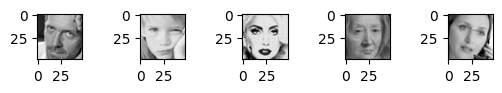

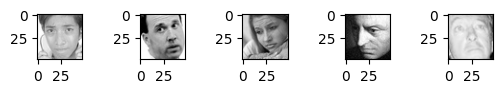

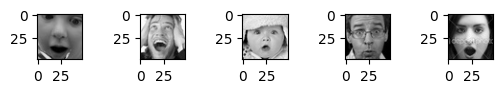

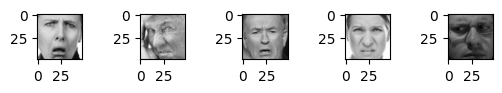

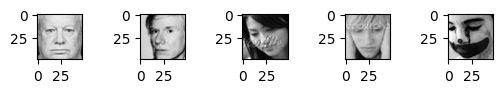

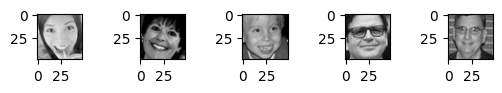

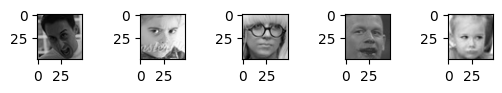

In [3]:
for expression in os.listdir(basepath + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(basepath + "train/" + expression + "/" + os.listdir(basepath + "train/" + expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img, cmap="gray")
        
    plt.show()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
batch_size = 128
base_path = "data/images/"

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  rotation_range = 20,
                                  horizontal_flip = True
                                  )

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                   target_size = (56,56),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                    shuffle = True
                                                   )

validation_generator = validation_datagen.flow_from_directory(base_path + "validation",
                                                             target_size = (56,56),
                                                             color_mode = "grayscale",
                                                             batch_size = batch_size,
                                                             class_mode = "categorical",
                                                             shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [8]:
num_classes = 7

model = Sequential()

model.add(Conv2D(64,(3,3), padding="same", input_shape=(56,56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(5,5), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])

/home/boba/Desktop/Projects/facial-emotion-classifier/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751816569.540458   32641 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5425 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:08:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

None


In [9]:
from keras.callbacks import ModelCheckpoint

In [10]:
%%time

epochs= 50

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='max')
callbacks_list=[checkpoint]

history = model.fit(
                    train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    epochs=epochs,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.n//validation_generator.batch_size,
                    callbacks=callbacks_list
                    )

/home/boba/Desktop/Projects/facial-emotion-classifier/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1751816573.173735   32745 service.cc:152] XLA service 0x7c602801b460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751816573.173752   32745 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-07-06 22:42:53.258160: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751816573.681343   32745 cuda_dnn.cc:529] Loaded cuDNN version 91001


  3/225 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.1293 - loss: 2.4421  

I0000 00:00:1751816581.503342   32745 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1937 - loss: 2.1799

/home/boba/Desktop/Projects/facial-emotion-classifier/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-07-06 22:43:18.635518: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212', 76 bytes spill stores, 76 bytes spill loads

2025-07-06 22:43:18.727216: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_212_0', 116 bytes spill stores, 116 bytes spill loads

2025-07-06 22:43:18.967753: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.c


Epoch 1: val_loss improved from -inf to 1.82600, saving model to model_weights.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 87ms/step - accuracy: 0.1939 - loss: 2.1791 - val_accuracy: 0.2592 - val_loss: 1.8260
Epoch 2/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.1719 - loss: 2.1347

/home/boba/Desktop/Projects/facial-emotion-classifier/venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 1.82600
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1719 - loss: 2.1347 - val_accuracy: 0.2592 - val_loss: 1.8260
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2268 - loss: 1.9799
Epoch 3: val_loss improved from 1.82600 to 1.82730, saving model to model_weights.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.2268 - loss: 1.9798 - val_accuracy: 0.2592 - val_loss: 1.8273
Epoch 4/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2500 - loss: 1.9847
Epoch 4: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2500 - loss: 1.9847 - val_accuracy: 0.2592 - val_loss: 1.8267
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2353 - loss: 1.9325
Epoch 5: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.2353 - loss: 1.9325 - val_accuracy: 0.2712 - val_loss: 1.7908
Epoch 6/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.2969 - loss: 1.8330
Epoch 6: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2969 - loss: 1.8330 - val_accuracy: 0.2722 - val_loss: 1.7912
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2400 - loss: 1.8942
Epoch 7: val_loss did not improve from 

224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4146 - loss: 1.4962
Epoch 29: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.4147 - loss: 1.4961 - val_accuracy: 0.4533 - val_loss: 1.4873
Epoch 30/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4766 - loss: 1.4088
Epoch 30: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4766 - loss: 1.4088 - val_accuracy: 0.4574 - val_loss: 1.4676
Epoch 31/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4293 - loss: 1.4667
Epoch 31: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.4293 - loss: 1.4667 - val_accuracy: 0.4861 - val_loss: 1.3272
Epoch 32/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4922 - loss: 1.4193
Epoch 32: val_loss did not improve from 1.82730
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4922 - loss: 1.4193 - val_accuracy: 0.4834 - val_loss: 1.3